# Análise exploratória sobre as eleições de 2022

In [70]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px

**Dados que serão analisados**

Inicialmente vamos explorar os dados de todos candidatos à deputado federal. Vamos extrair informações dos arquivos que o TSE disponibiliza no [site](https://dadosabertos.tse.jus.br/dataset/). Outros links úteis:  
[Divulgação de candidaturas e contas eleitorais](https://divulgacandcontas.tse.jus.br/divulga/#/)  
[Conjuntos de dados sobre as eleições](https://sig.tse.jus.br/ords/dwapr/r/seai/sig-eleicao-arquivo/conjuntos-de-dados)

Abaixo o código para fazer a leitura e construção dos Data Frames necessários.

In [71]:
CONSULT = "/consulta_cand_2022/consulta_cand_2022_"
ASSETS = "/bem_candidato_2022/bem_candidato_2022_"
VOTING = "/votacao_candidato_munzona_2022/votacao_candidato_munzona_2022_"
EXPENSE_PAID = "/prestacao_de_contas_eleitorais_candidatos_2022/despesas_pagas_candidatos_2022_"
CONTRACTED_EXPENSE = "/prestacao_de_contas_eleitorais_candidatos_2022/despesas_contratadas_candidatos_2022_"
STATES = ["AC", "AL", "AP", "AM", "BA", "CE", "DF", "ES", "GO",
          "MA", "MT", "MS", "MG", "PA", "PB", "PR", "PE", "PI",
          "RJ", "RN", "RS", "RO", "RR", "SC", "SP", "SE", "TO"]

df_candidates = pd.DataFrame()
df_cand_assets = pd.DataFrame()
df_cand_voting = pd.DataFrame()
df_cand_revenues = pd.DataFrame()
df_cand_expense_paid = pd.DataFrame()
df_cand_contracted_expense = pd.DataFrame()
voting_cols = ["SG_UF", "SQ_CANDIDATO", "NM_CANDIDATO", "SQ_COLIGACAO",
               "QT_VOTOS_NOMINAIS_VALIDOS", "SQ_COLIGACAO", "NM_COLIGACAO", 
               "DS_SIT_TOT_TURNO"]
expense_paid_cols = ["SG_UF", "SQ_PRESTADOR_CONTAS", "SQ_DESPESA", "VR_PAGTO_DESPESA"]
contracted_expense_cols = ["SQ_PRESTADOR_CONTAS", "SG_UF", "DS_CARGO", "SQ_CANDIDATO", 
                           "NR_CPF_CNPJ_FORNECEDOR", "NM_FORNECEDOR", "SQ_DESPESA",
                           "VR_DESPESA_CONTRATADA"]

for sg in STATES:
    df_cand_temp = pd.read_csv(os.getcwd() +
                               f"/db{CONSULT + sg}.csv",
                               sep=";", encoding="iso-8859-1")

    df_assets_temp = pd.read_csv(os.getcwd() +
                                f"/db{ASSETS + sg}.csv",
                                sep=";", encoding="iso-8859-1")

    df_voting_temp = pd.read_csv(os.getcwd() + 
                                f"/db{VOTING + sg}.csv",
                                sep=";", encoding="iso-8859-1",
                                usecols=voting_cols)

    df_cand_expense_paid_temp = pd.read_csv(os.getcwd() + 
                                            f"/db{EXPENSE_PAID + sg}.csv",
                                            sep=";", encoding="iso-8859-1",
                                            usecols=expense_paid_cols)
    
    df_cand_contracted_expense_temp = pd.read_csv(os.getcwd() + 
                                                  f"/db{CONTRACTED_EXPENSE + sg}.csv",
                                                  sep=";", encoding="iso-8859-1",
                                                  usecols=contracted_expense_cols)
    
    df_candidates = pd.concat([df_candidates, df_cand_temp])
    df_cand_assets = pd.concat([df_cand_assets, df_assets_temp])
    df_cand_voting = pd.concat([df_cand_voting, df_voting_temp])
    df_cand_expense_paid = pd.concat([df_cand_expense_paid, df_cand_expense_paid_temp])
    df_cand_contracted_expense = pd.concat([df_cand_contracted_expense, df_cand_contracted_expense_temp])

df_cand_revenues = pd.read_csv(os.getcwd() +
                              f"/db/receitas_candidatos.csv",
                              sep=",", encoding="utf-8")


In [72]:
display(df_candidates.head())
display(df_candidates.columns)
display(df_candidates.shape)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,NM_TIPO_DESTINACAO_VOTOS,CD_SITUACAO_CANDIDATO_TOT,DS_SITUACAO_CANDIDATO_TOT,ST_PREST_CONTAS
0,09/12/2022,18:37:33,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6003641820226010000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
1,09/12/2022,18:37:33,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6005495620226010000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
2,09/12/2022,18:37:33,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6007609220226010000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
3,09/12/2022,18:37:33,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6003729220226010000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
4,09/12/2022,18:37:33,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6003581120226010000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S


Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'NR_FEDERACAO',
       'NM_FEDERACAO', 'SG_FEDERACAO', 'DS_COMPOSICAO_FEDERACAO',
       'SQ_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO',
       'CD_NACIONALIDADE', 'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO',
       'CD_MUNICIPIO_NASCIMENTO', 'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_IDADE_DATA_POSSE', 'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO',
       'DS_GENERO', 'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO',
       'CD_ESTAD

(29284, 71)

In [73]:
display(df_cand_assets.head())
display(df_cand_assets.columns)
display(df_cand_assets.shape)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
0,09/12/2022,18:37:14,2022,2,Eleição Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,AC,AC,ACRE,10001595335,1,21,"Veículo automotor terrestre: caminhão, automóv...",Carro marca Toyota modelo etios,"40000,00",02/10/2022,23:21:28
1,09/12/2022,18:37:14,2022,2,Eleição Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,AC,AC,ACRE,10001595335,2,21,"Veículo automotor terrestre: caminhão, automóv...",Motocicleta marca Honda modelo PCX,"20000,00",02/10/2022,23:21:28
2,09/12/2022,18:37:14,2022,2,Eleição Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,AC,AC,ACRE,10001601556,15,21,"Veículo automotor terrestre: caminhão, automóv...",TOYOTA LAND CRUISER PR 2005/2006,"77000,00",02/10/2022,23:21:28
3,09/12/2022,18:37:14,2022,2,Eleição Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,AC,AC,ACRE,10001595336,1,12,Casa,uma casa em alvenaria,"400000,00",02/10/2022,23:21:28
4,09/12/2022,18:37:14,2022,2,Eleição Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,AC,AC,ACRE,10001595340,2,21,"Veículo automotor terrestre: caminhão, automóv...",Motocicleta Honda CB 300 ano 2011,"10000,00",02/10/2022,23:21:28


Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'SG_UF',
       'SG_UE', 'NM_UE', 'SQ_CANDIDATO', 'NR_ORDEM_CANDIDATO',
       'CD_TIPO_BEM_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO', 'DS_BEM_CANDIDATO',
       'VR_BEM_CANDIDATO', 'DT_ULTIMA_ATUALIZACAO', 'HH_ULTIMA_ATUALIZACAO'],
      dtype='object')

(92390, 19)

In [74]:
display(df_cand_voting.head())
display(df_cand_voting.columns)
display(df_cand_voting.shape)

,SG_UF,SQ_CANDIDATO,NM_CANDIDATO,SQ_COLIGACAO,NM_COLIGACAO,QT_VOTOS_NOMINAIS_VALIDOS,DS_SIT_TOT_TURNO
0,AC,10001650026,RUTENILSON CRISPIM DA SILVA,10001683298,PARTIDO ISOLADO,0,SUPLENTE
1,AC,10001601445,ESPERIDIÃO TEIXEIRA DE SOUZA FILHO,10001681113,PARTIDO ISOLADO,3,SUPLENTE
2,AC,10001649312,JOSE TARCISIO MEDEIROS DE MORAES,10001683275,PARTIDO ISOLADO,55,SUPLENTE
3,AC,10001595347,WILLIAN DOS SANTOS FRANCA,10001680825,FEDERAÇÃO,0,NÃO ELEITO
4,AC,10001622767,JOAQUIM FLORÊNCIO DA SILVA,10001682313,PARTIDO ISOLADO,1,SUPLENTE


Index(['SG_UF', 'SQ_CANDIDATO', 'NM_CANDIDATO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
       'QT_VOTOS_NOMINAIS_VALIDOS', 'DS_SIT_TOT_TURNO'],
      dtype='object')

(9297887, 7)

In [75]:
display(df_cand_revenues.head())
display(df_cand_revenues.columns)
display(df_cand_revenues.shape)

,Cargo,Espécie receita,Fonte de receita,Nome candidato,Nome doador,Origem da receita,Partido,Situação de candidatura,Situação de totalização,UF,Valor de receita,Data de carga
0,Deputado Distrital,--,FUNDO ESPECIAL,CLÁUDIA VIRGÍNIA RODRIGUES PEREIRA,#NULO#,Rendimentos de aplicações financeiras,PODE,Apto,Não eleito,DF,3.47,2024-01-30 01:04:47
1,Deputado Distrital,--,FUNDO ESPECIAL,CRISTIANE PEREIRA DOS SANTOS,#NULO#,Rendimentos de aplicações financeiras,PT,Apto,Suplente,DF,34.88,2024-01-30 01:04:47
2,Deputado Distrital,--,FUNDO ESPECIAL,FRANCISCO DOMINGOS DOS SANTOS,#NULO#,Rendimentos de aplicações financeiras,PT,Apto,Eleito por QP,DF,35.41,2024-01-30 01:04:47
3,Deputado Distrital,--,FUNDO ESPECIAL,GISELE CRISTINE DE ALMEIDA MONTENEGRO,#NULO#,Rendimentos de aplicações financeiras,PP,Apto,Suplente,DF,71.79,2024-01-30 01:04:47
4,Deputado Distrital,--,FUNDO ESPECIAL,JOSÉ CLÁUDIO BONINA,#NULO#,Rendimentos de aplicações financeiras,MDB,Apto,Suplente,DF,173.66,2024-01-30 01:04:47


Index(['Cargo', 'Espécie receita', 'Fonte de receita', 'Nome candidato',
       'Nome doador', 'Origem da receita', 'Partido',
       'Situação de candidatura', 'Situação de totalização', 'UF',
       'Valor de receita', 'Data de carga'],
      dtype='object')

(546331, 12)

In [76]:
display(df_cand_expense_paid.head())
display(df_cand_expense_paid.columns)
display(df_cand_expense_paid.shape)

,SQ_PRESTADOR_CONTAS,SG_UF,SQ_DESPESA,VR_PAGTO_DESPESA
0,3791358983,AC,48073944,"500,00"
1,3780998577,AC,50896971,"1616,00"
2,3780998577,AC,50896980,"1818,00"
3,3780998577,AC,50897051,"300,00"
4,3780998577,AC,50897184,"1818,00"


Index(['SQ_PRESTADOR_CONTAS', 'SG_UF', 'SQ_DESPESA', 'VR_PAGTO_DESPESA'], dtype='object')

(2394890, 4)

In [77]:
display(df_cand_contracted_expense.head())
display(df_cand_contracted_expense.columns)
display(df_cand_contracted_expense.shape)

,SQ_PRESTADOR_CONTAS,SG_UF,DS_CARGO,SQ_CANDIDATO,NR_CPF_CNPJ_FORNECEDOR,NM_FORNECEDOR,SQ_DESPESA,VR_DESPESA_CONTRATADA
0,3758120822,AC,Deputado Estadual,10001601422,36599964000145,X. O. DO VALE,47611322,"1400,00"
1,3758120822,AC,Deputado Estadual,10001601422,36599964000145,X. O. DO VALE,47611322,"1200,00"
2,3758120822,AC,Deputado Estadual,10001601422,36599964000145,X. O. DO VALE,47611322,"290,00"
3,3797151024,AC,Deputado Federal,10001655721,43271321000133,GRUPO SEVEN COMERCIO E SERVIÇOS LTDA,52035977,"16000,00"
4,3794801898,AC,Senador,10001643706,47552865000124,JUSCYHELISON OLIVEIRA ROSA TAVARES,51928091,"10000,00"


Index(['SQ_PRESTADOR_CONTAS', 'SG_UF', 'DS_CARGO', 'SQ_CANDIDATO',
       'NR_CPF_CNPJ_FORNECEDOR', 'NM_FORNECEDOR', 'SQ_DESPESA',
       'VR_DESPESA_CONTRATADA'],
      dtype='object')

(2182250, 8)

Como vamos focar nas eleições para a Câmara, vamos limpar os Data Frames afim de conseguir os dados apenas dos candidatos à Deputado Federal.

In [78]:
df_cand_fed_dep = df_candidates[df_candidates["DS_CARGO"] == "DEPUTADO FEDERAL"]
df_cand_fed_dep = df_cand_fed_dep[df_cand_fed_dep["DS_SITUACAO_CANDIDATURA"] == "APTO"]

df_cand_assets_total = df_cand_assets[df_cand_assets["SQ_CANDIDATO"].isin(df_cand_fed_dep["SQ_CANDIDATO"])]
df_cand_assets_total.loc[:,"VR_BEM_CANDIDATO"] = df_cand_assets_total["VR_BEM_CANDIDATO"].str.replace(",", ".").astype(float)
df_cand_assets_total = df_cand_assets_total.groupby("SQ_CANDIDATO")["VR_BEM_CANDIDATO"].sum().reset_index()

df_cand_voting_total = df_cand_voting[df_cand_voting["SQ_CANDIDATO"].isin(df_cand_fed_dep["SQ_CANDIDATO"])]
df_cand_voting_total = df_cand_voting_total.groupby(["SQ_CANDIDATO", "DS_SIT_TOT_TURNO"]).agg({"QT_VOTOS_NOMINAIS_VALIDOS": "sum"}).reset_index()

df_cand_revenues_total = df_cand_revenues[df_cand_revenues["Cargo"] == "Deputado Federal"]
df_cand_revenues_total = df_cand_revenues_total.groupby(["Nome candidato", "Partido"]).agg({"Valor de receita": "sum"}).reset_index()

df_cand_contr_expense_total = df_cand_contracted_expense[df_cand_contracted_expense["SQ_CANDIDATO"].isin(df_cand_fed_dep["SQ_CANDIDATO"])]
df_cand_contr_expense_total.loc[:, "VR_DESPESA_CONTRATADA"] = df_cand_contr_expense_total["VR_DESPESA_CONTRATADA"].str.replace(",", ".").astype(float)
df_cand_contr_expense_total = df_cand_contr_expense_total.groupby(["SQ_CANDIDATO", "SQ_PRESTADOR_CONTAS"]).agg({"VR_DESPESA_CONTRATADA": "sum"}).reset_index()
df_cand_expense_paid_total = df_cand_expense_paid[df_cand_expense_paid["SQ_PRESTADOR_CONTAS"].isin(df_cand_contr_expense_total["SQ_PRESTADOR_CONTAS"])]
df_cand_expense_paid_total.loc[:, "VR_PAGTO_DESPESA"] = df_cand_expense_paid_total["VR_PAGTO_DESPESA"].str.replace(",", ".").astype(float)
df_cand_expense_paid_total = df_cand_expense_paid_total.groupby("SQ_PRESTADOR_CONTAS")["VR_PAGTO_DESPESA"].sum().reset_index()
df_cand_expense_total = pd.merge(df_cand_expense_paid_total, df_cand_contr_expense_total, on="SQ_PRESTADOR_CONTAS")

In [79]:
display(df_cand_fed_dep.head())
display(df_cand_fed_dep.shape)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,NM_TIPO_DESTINACAO_VOTOS,CD_SITUACAO_CANDIDATO_TOT,DS_SITUACAO_CANDIDATO_TOT,ST_PREST_CONTAS
0,09/12/2022,18:37:33,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6003641820226010000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
3,09/12/2022,18:37:33,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6003729220226010000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
4,09/12/2022,18:37:33,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6003581120226010000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
5,09/12/2022,18:37:33,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6001858420226010000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
13,09/12/2022,18:37:33,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6006656220226010000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S


(9530, 71)

In [80]:
display(df_cand_assets_total.head())
display(df_cand_assets_total.shape)

,SQ_CANDIDATO,VR_BEM_CANDIDATO
0,10001595342,225000.0
1,10001595343,140000.0
2,10001595344,925000.0
3,10001601531,350000.0
4,10001601532,55000.0


(6257, 2)

In [81]:
display(df_cand_voting_total.head())
display(df_cand_voting_total.shape)

,SQ_CANDIDATO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS_VALIDOS
0,10001595342,NÃO ELEITO,175
1,10001595343,NÃO ELEITO,120
2,10001595344,NÃO ELEITO,176
3,10001595345,NÃO ELEITO,2794
4,10001595346,NÃO ELEITO,114


(9530, 3)

In [82]:
display(df_cand_revenues_total.head())
display(df_cand_revenues_total.shape)

,Nome candidato,Partido,Valor de receita
0,LURDENIS DE ALENCAR VIEIRA,AVANTE,407500.00
1,AAVA SANTIAGO AGUIAR,PSDB,1663431.98
2,ABDIAS DE MELO TEIXEIRA NETO,PP,200000.00
3,ABDIAS FELIPE FRANCO,AVANTE,103000.00
4,ABEL BICHESKI,SOLIDARIEDADE,40000.00


(9410, 3)

In [83]:
display(df_cand_expense_total.head())
display(df_cand_expense_total.shape)

,SQ_PRESTADOR_CONTAS,VR_PAGTO_DESPESA,SQ_CANDIDATO,VR_DESPESA_CONTRATADA
0,3720262448,1721.84,110001593944,1721.84
1,3720262449,4656.91,110001593945,4665.88
2,3720262603,4380.78,110001593943,4380.78
3,3720262604,3044.98,110001593946,3044.98
4,3720262625,16014.0,110001593947,16014.0


(9472, 4)

In [84]:
cands_wo_assets = df_cand_fed_dep[~df_cand_fed_dep["SQ_CANDIDATO"].isin(df_cand_assets_total["SQ_CANDIDATO"])]["SQ_CANDIDATO"]
cands_wo_voting = df_cand_fed_dep[~df_cand_fed_dep["SQ_CANDIDATO"].isin(df_cand_voting_total["SQ_CANDIDATO"])]["SQ_CANDIDATO"]
cands_wo_revenues = df_cand_fed_dep[~df_cand_fed_dep["NM_CANDIDATO"].isin(df_cand_revenues_total["Nome candidato"])]["SQ_CANDIDATO"]
cands_wo_expense_paid = df_cand_fed_dep[~df_cand_fed_dep["SQ_CANDIDATO"].isin(df_cand_expense_total["SQ_CANDIDATO"])]["SQ_CANDIDATO"]

df_cand_fed_dep[df_cand_fed_dep["SQ_CANDIDATO"].isin(cands_wo_assets)]["NM_CANDIDATO"]
df_cand_fed_dep[df_cand_fed_dep["SQ_CANDIDATO"].isin(cands_wo_voting)]["NM_CANDIDATO"]
df_cand_fed_dep[df_cand_fed_dep["SQ_CANDIDATO"].isin(cands_wo_voting)]["SG_UF"]
df_cand_fed_dep[df_cand_fed_dep["SQ_CANDIDATO"].isin(cands_wo_voting)]["SG_UF"].nunique() == 1
df_cand_fed_dep[df_cand_fed_dep["SQ_CANDIDATO"].isin(cands_wo_revenues)]["NM_CANDIDATO"]

27          JECE LUIZ DA SILVA FERREIRA
38            WILLIAN DOS SANTOS FRANCA
64      EDNA APARECIDA NANTES DE CASTRO
91           RAPHAEL LUIZ BASTOS JUNIOR
129       CARLOS LEANDRO DA COSTA SOUSA
                     ...               
300      GLEYDSON RANYERE ALVES BARBOSA
331          LUIS DA CONCEIÇÃO DA COSTA
351    MISMA GONÇALVES FERREIRA BATISTA
364           JOÃO PAULO LOPES DE SOUZA
411                JOANYR SOARES ARAUJO
Name: NM_CANDIDATO, Length: 1107, dtype: object

In [85]:
df_complete = pd.DataFrame()
df_complete = pd.merge(df_cand_fed_dep, df_cand_assets_total, on="SQ_CANDIDATO", how="left")
df_complete = pd.merge(df_complete, df_cand_voting_total, on="SQ_CANDIDATO", how="left")
df_complete = pd.merge(df_complete, df_cand_revenues_total, left_on=["NM_CANDIDATO", "SG_PARTIDO"],
                            right_on=["Nome candidato", "Partido"], how="left")
df_complete = pd.merge(df_complete, df_cand_expense_total, on="SQ_CANDIDATO", how="left")
df_complete = df_complete.drop(["Nome candidato", "Partido"], axis=1)
df_complete.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'NR_FEDERACAO',
       'NM_FEDERACAO', 'SG_FEDERACAO', 'DS_COMPOSICAO_FEDERACAO',
       'SQ_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO',
       'CD_NACIONALIDADE', 'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO',
       'CD_MUNICIPIO_NASCIMENTO', 'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_IDADE_DATA_POSSE', 'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO',
       'DS_GENERO', 'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO',
       'CD_ESTAD

In [86]:
elected = df_complete["DS_SIT_TOT_TURNO_y"].str.contains(r"ELEITO .*")
elected.value_counts()
(df_complete["DS_SIT_TOT_TURNO_y"].str.contains(r"ELEITO .*") & (df_complete["ST_REELEICAO"] == "S")).value_counts()


False    9246
True      284
Name: count, dtype: int64

In [87]:
def plot_barh_comp(data1, data2, title, xlabel, ylabel, size=(10, 10)):    
    plt.figure(figsize=size)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.barh(data1.index, data1.values, color="salmon")
    plt.barh(data2.index, data2.values, color="mediumpurple")

    for index, value in zip(data1.index, data1.values):
        plt.text(value, index, f"{value}", va="top", ha="left", fontsize=10, color="k")

    for index, value in zip(data2.index, data2.values):
        plt.text(value, index, f"{value}", va="center", ha="left", fontsize=10, color="k")


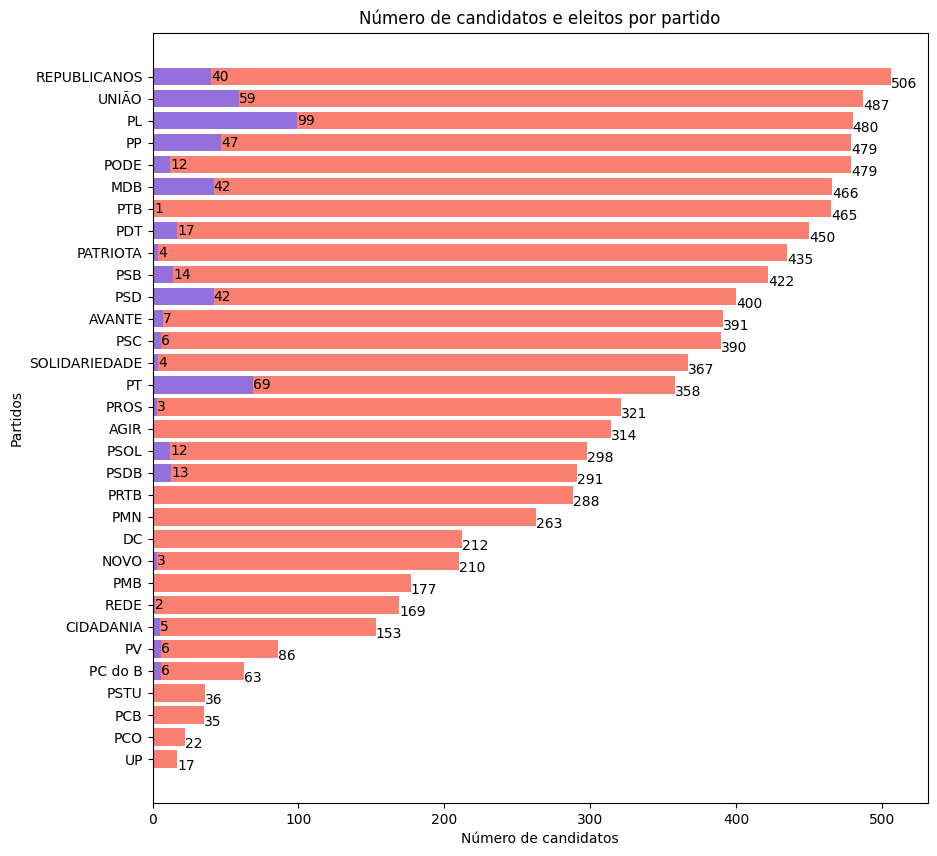

In [88]:
dep_parties = df_complete["SG_PARTIDO"].value_counts().sort_values()
dep_elected = df_complete[df_complete["DS_SIT_TOT_TURNO_y"].str.contains(r"ELEITO .*")]
dep_elected_by_party = dep_elected.groupby("SG_PARTIDO").size().sort_values()

plot_barh_comp(dep_parties, dep_elected_by_party, "Número de candidatos e eleitos por partido",
               "Número de candidatos", "Partidos")

In [89]:
def plot_barh_prop(data, title, xlabel, ylabel, size=(10, 10)):
    plt.figure(figsize=size)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.barh(data.index, 1, color="salmon")
    plt.barh(data.index, data.values, color="mediumpurple")

    for index, prop in zip(data.index, data.values):
        plt.text(prop, index, f"{(prop*100):.1f}%", va="center", ha="left", fontsize=10, color="k")

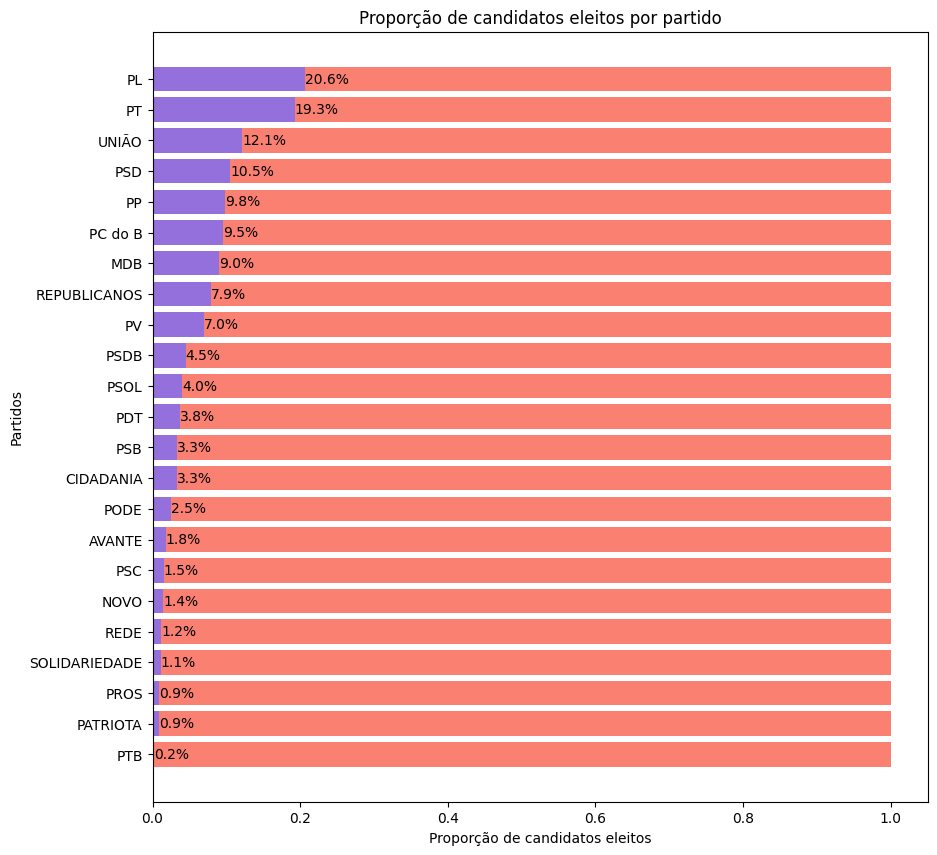

In [90]:
prop_elected_by_party = dep_elected_by_party / dep_parties
prop_elected_by_party = prop_elected_by_party.dropna().sort_values()

plot_barh_prop(prop_elected_by_party, "Proporção de candidatos eleitos por partido",
               "Proporção de candidatos eleitos", "Partidos")

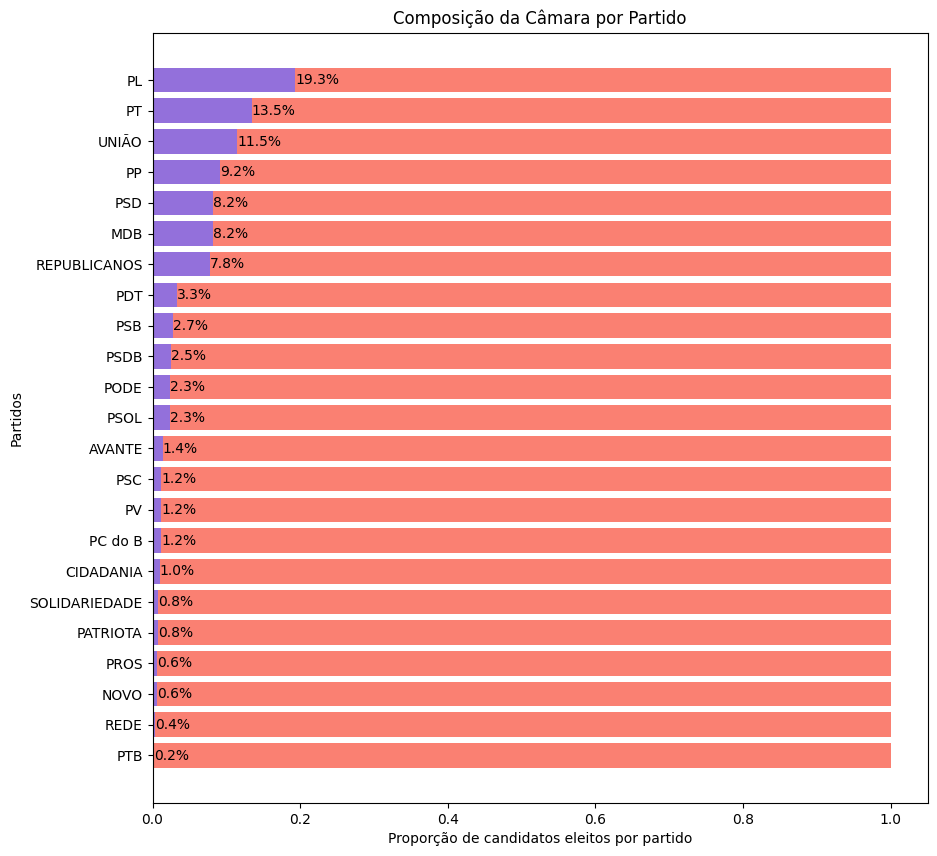

In [91]:
prop_elected_by_party = dep_elected_by_party / len(dep_elected)
prop_elected_by_party = prop_elected_by_party.dropna().sort_values()
plot_barh_prop(prop_elected_by_party, "Composição da Câmara por Partido",
               "Proporção de candidatos eleitos por partido", "Partidos")

In [92]:
def plot_barh(data, title, xlabel, ylabel, size=(10, 10), color="salmon"):
    plt.figure(figsize=size)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.barh(data.index, data.values, color=color)

    for index, value in zip(data.index, data.values):
        plt.text(value, index, f"{value}", va="center", ha="left", fontsize=10, color="k")

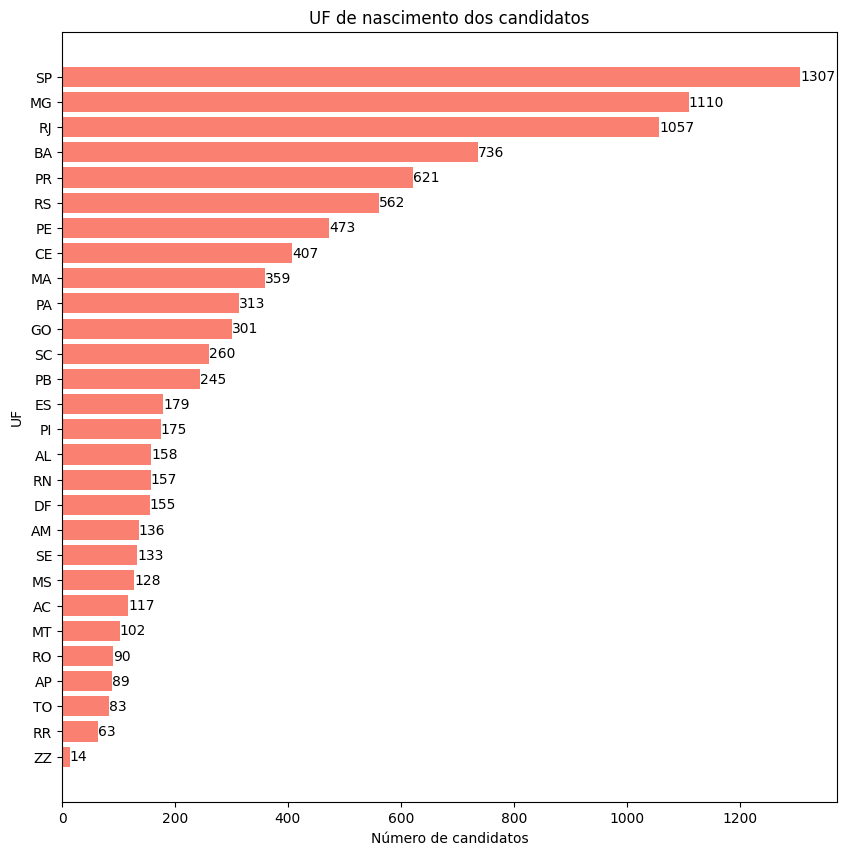

In [93]:
dep_birth = df_complete["SG_UF_NASCIMENTO"].value_counts().sort_values()
plot_barh(dep_birth, "UF de nascimento dos candidatos", "Número de candidatos", "UF", (10, 10), "salmon")

In [94]:
def plot_pie(data, title, labels="", autopct="", size=(10, 6)):
    plt.figure(figsize=(size))
    plt.title(title)
    plt.pie(data, autopct=autopct, startangle=90, pctdistance=1.2)
    plt.legend(labels=labels)

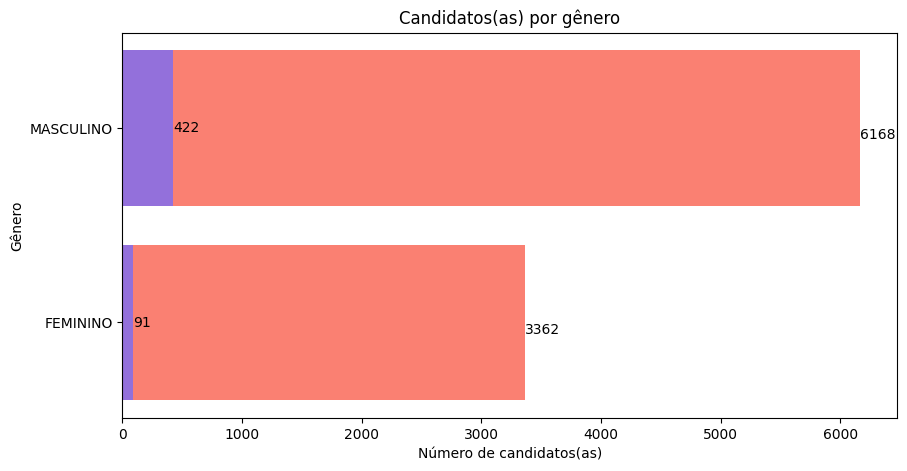

In [95]:
dep_gender = df_complete["DS_GENERO"].value_counts().sort_values()
dep_gender_elected = dep_elected["DS_GENERO"].value_counts().sort_values()
plot_barh_comp(dep_gender, dep_gender_elected, "Candidatos(as) por gênero", 
               "Número de candidatos(as)", "Gênero", (10, 5))

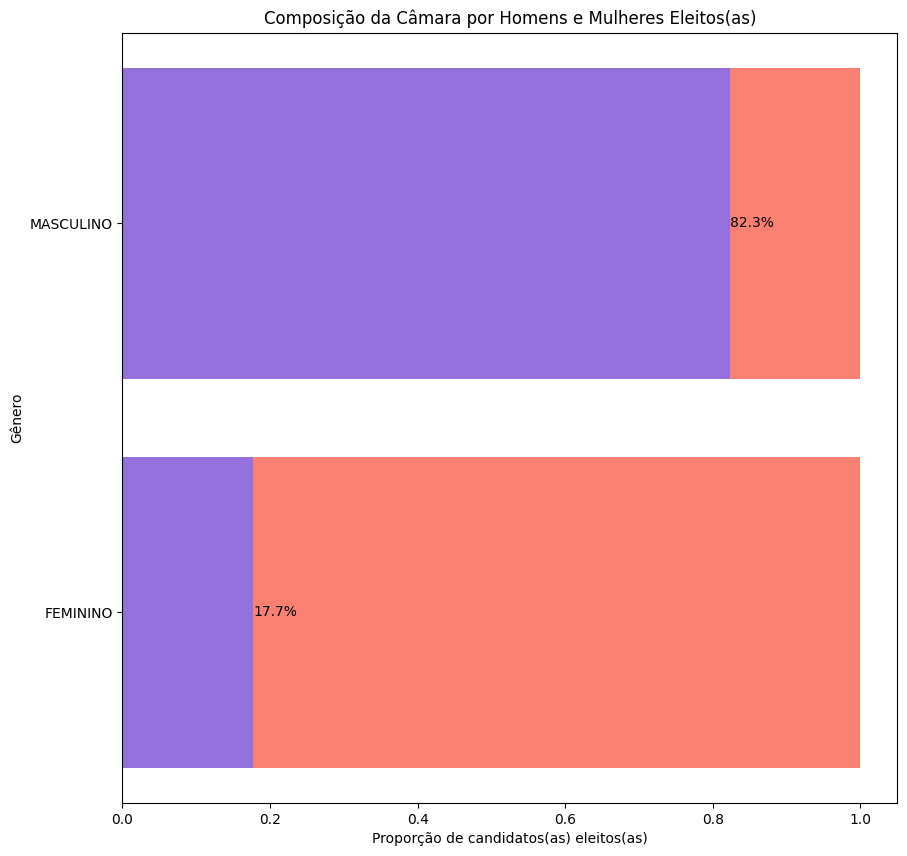

In [96]:
dep_gender_prop = (dep_gender_elected / len(dep_elected)).sort_values()
plot_barh_prop(dep_gender_prop, "Composição da Câmara por Homens e Mulheres Eleitos(as)",
               "Proporção de candidatos(as) eleitos(as)", "Gênero")

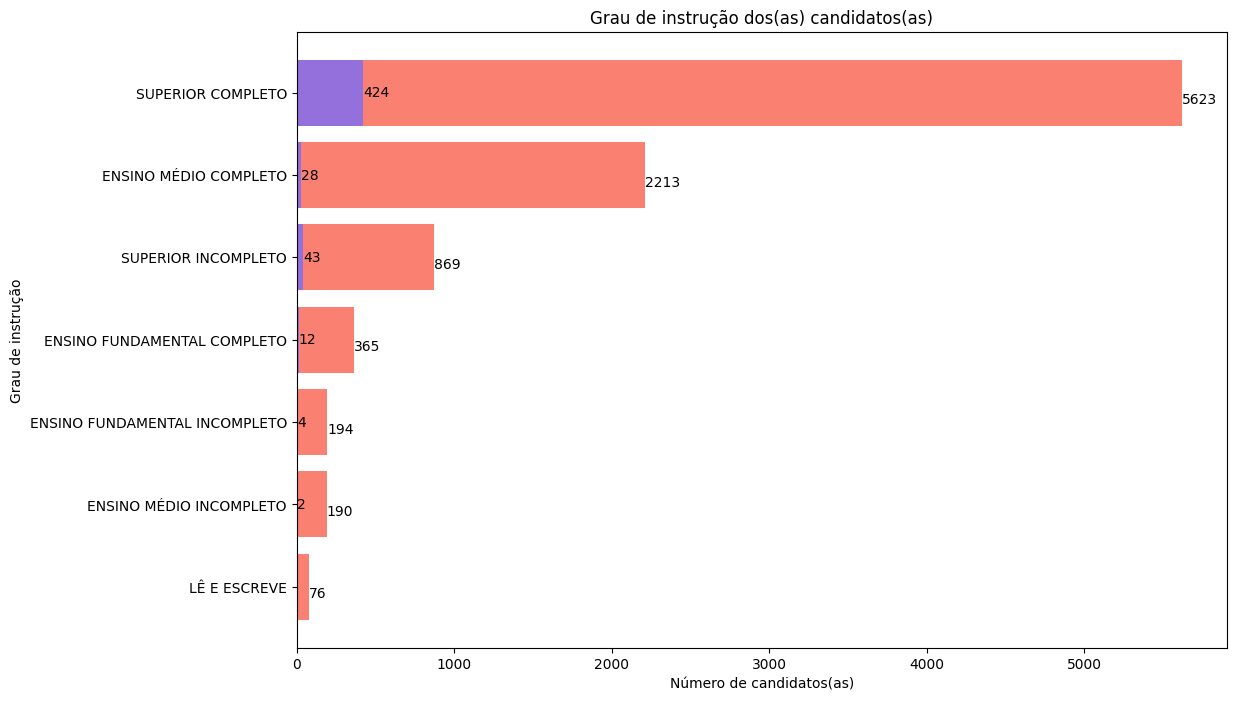

In [97]:
dep_education = df_complete["DS_GRAU_INSTRUCAO"].value_counts().sort_values()
dep_edu_elected = dep_elected["DS_GRAU_INSTRUCAO"].value_counts().sort_values()
plot_barh_comp(dep_education, dep_edu_elected, "Grau de instrução dos(as) candidatos(as)",
               "Número de candidatos(as)", "Grau de instrução", (12, 8))

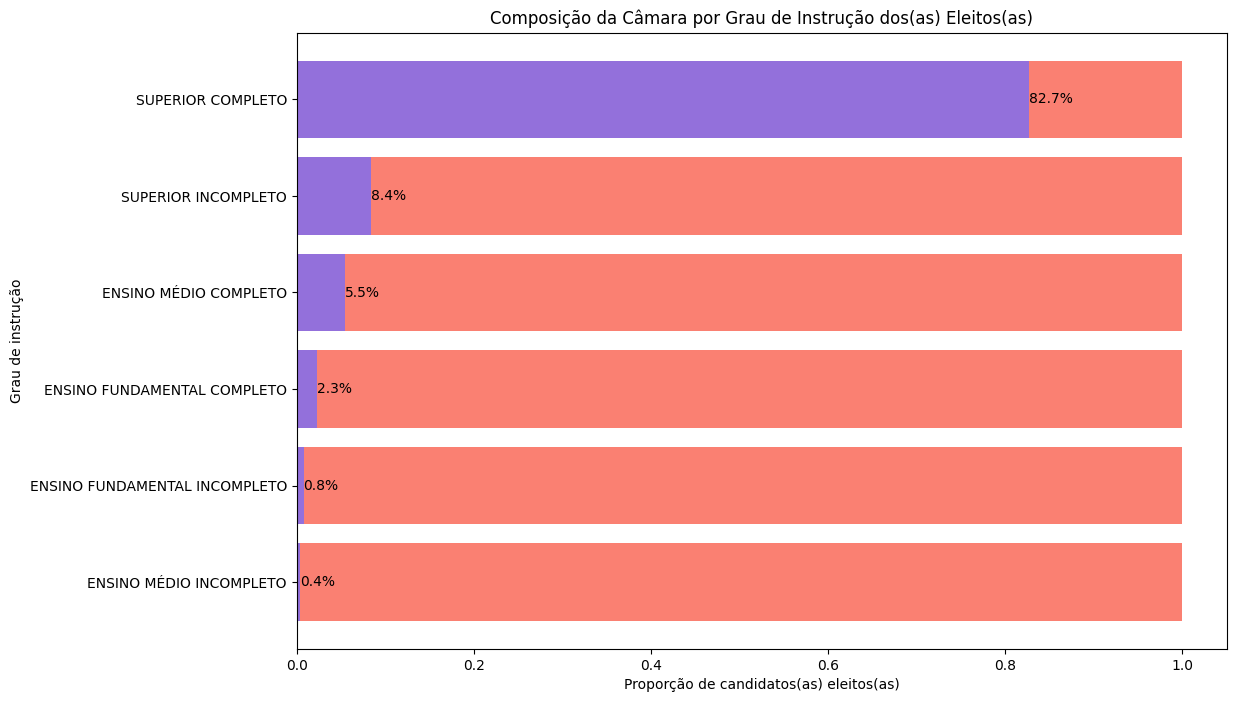

In [98]:
dep_education_prop = dep_edu_elected / len(dep_elected)
dep_education_prop = dep_education_prop.dropna().sort_values()
plot_barh_prop(dep_education_prop, "Composição da Câmara por Grau de Instrução dos(as) Eleitos(as)", 
               "Proporção de candidatos(as) eleitos(as)", "Grau de instrução", (12, 8))

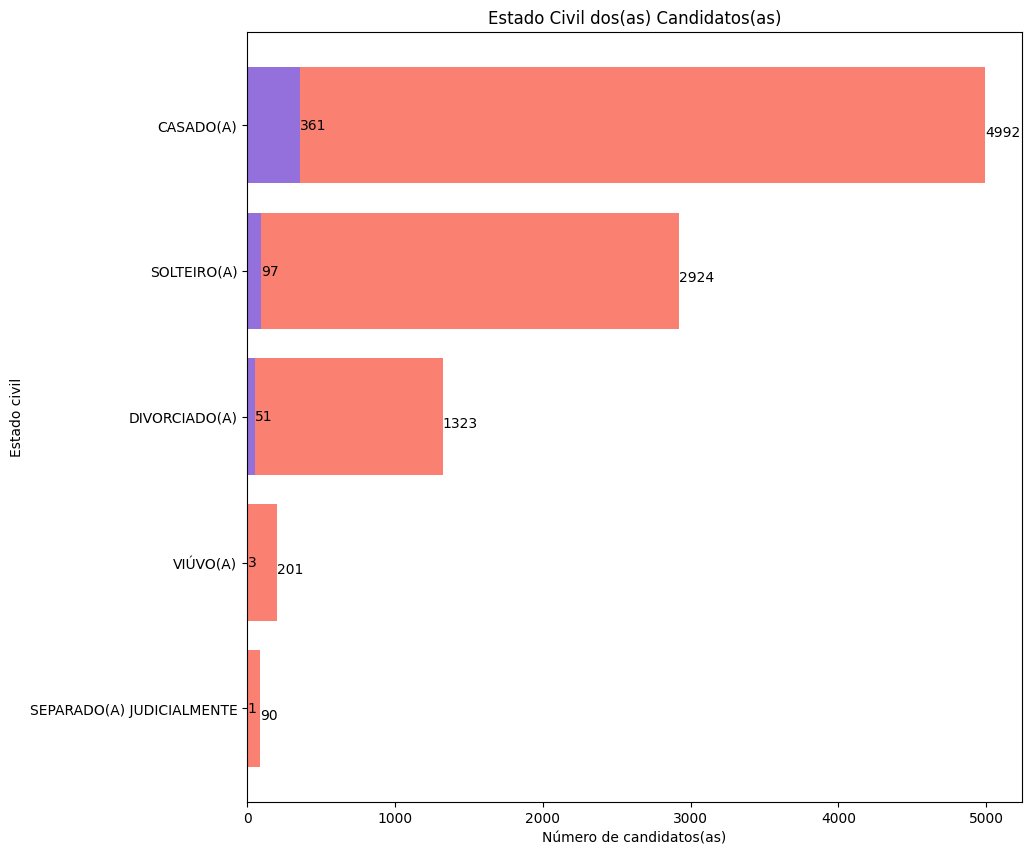

In [99]:
dep_marital_status = df_complete["DS_ESTADO_CIVIL"].value_counts().sort_values()
dep_marital_elected = dep_elected["DS_ESTADO_CIVIL"].value_counts().sort_values()
plot_barh_comp(dep_marital_status, dep_marital_elected, "Estado Civil dos(as) Candidatos(as)",
               "Número de candidatos(as)", "Estado civil")

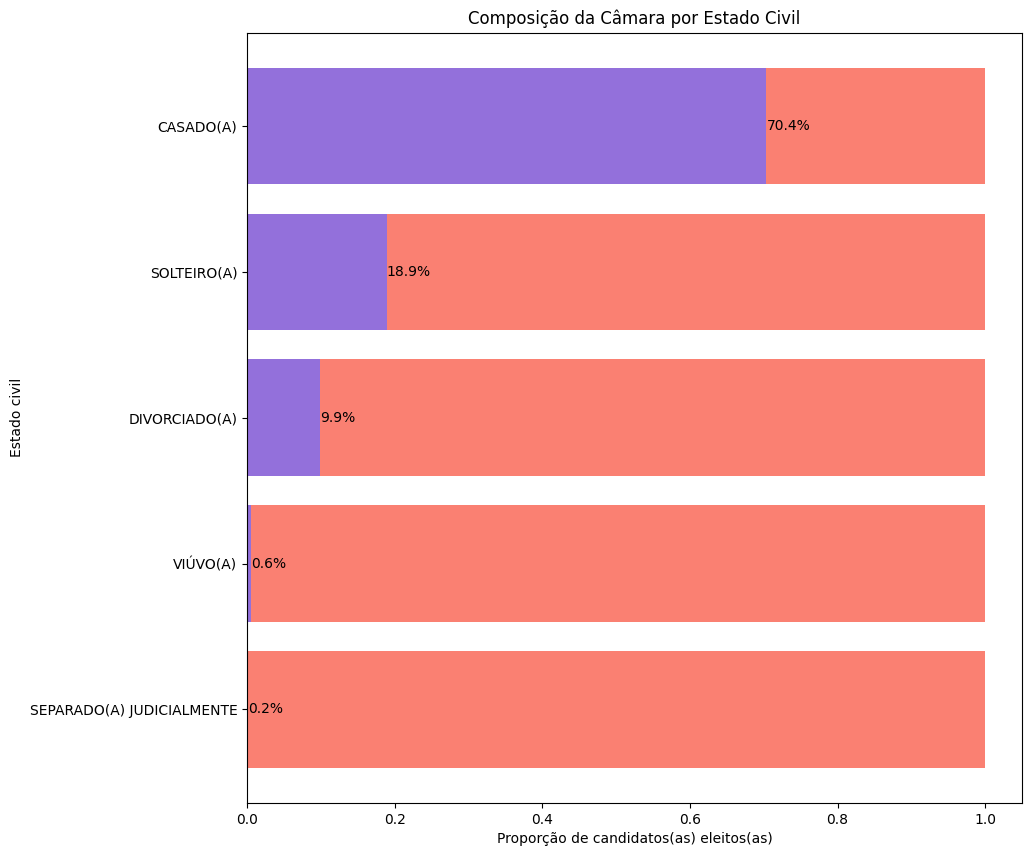

In [100]:
dep_marital_prop = dep_marital_elected / len(dep_elected)
plot_barh_prop(dep_marital_prop, "Composição da Câmara por Estado Civil",
               "Proporção de candidatos(as) eleitos(as)", "Estado civil")


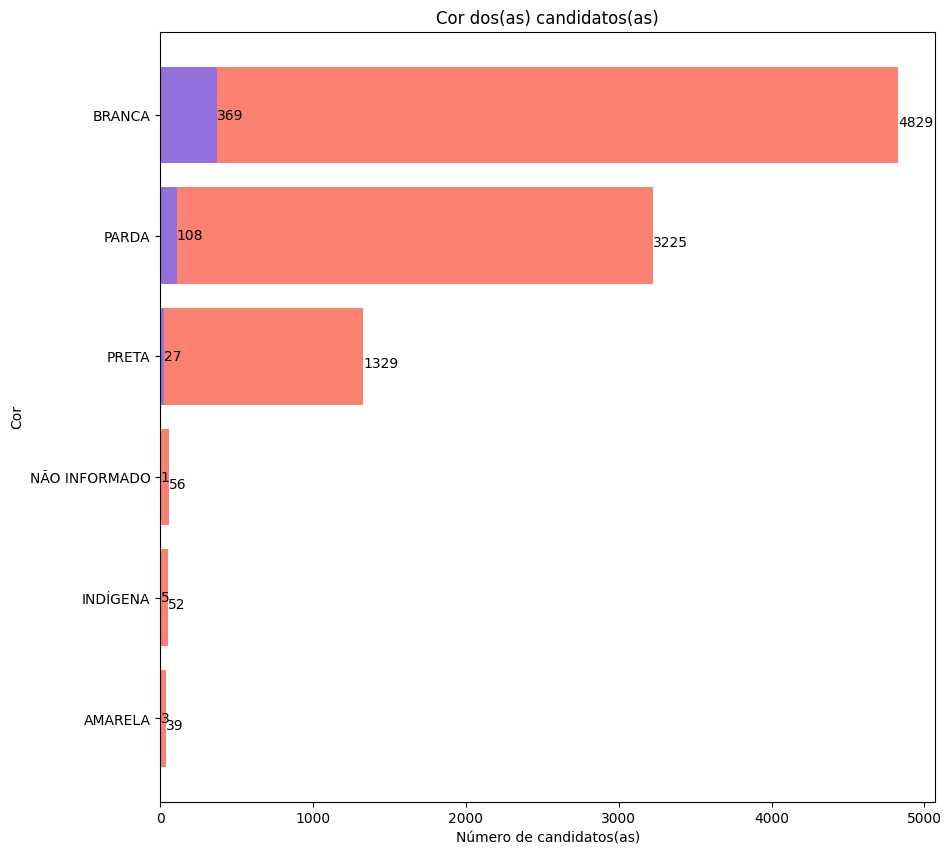

In [101]:
dep_color = df_complete["DS_COR_RACA"].value_counts().sort_values()
dep_color_elected = dep_elected["DS_COR_RACA"].value_counts().sort_values()
plot_barh_comp(dep_color, dep_color_elected, "Cor dos(as) candidatos(as)", "Número de candidatos(as)",
               "Cor")

In [102]:
# dep_color_prop = dep_color_elected / len(dep_elected)
# plot_barh_prop(dep_color_prop, "Composição da Câmara por Cor", "Proporção de eleitos(as)",
#                "Cor")

px.pie(dep_color, values=dep_color.values, names=dep_color.index)

In [103]:
dep_votes = df_complete.groupby("SG_PARTIDO").sum()["QT_VOTOS_NOMINAIS_VALIDOS"].sort_values()
px.bar(x=dep_votes.values,y=dep_votes.index, title="Votos por Partido", height=1000)

In [115]:
dep_ELECTED = df_complete.groupby("SG_PARTIDO")
display(dep_ELECTED)

AttributeError: 'SeriesGroupBy' object has no attribute 'str'

In [105]:
df = px.data.medals_long()

fig = px.bar(df, x="medal", y="count", color="nation",
             pattern_shape="nation", pattern_shape_sequence=[".", "x", "+"])
fig.show()
df

,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9
3,South Korea,silver,13
4,China,silver,15
5,Canada,silver,12
6,South Korea,bronze,11
7,China,bronze,8
8,Canada,bronze,12
